Psuedocode: 
Create a matrix of length of T/delta T by L/delta X
define a c

we have the initial 


In [1]:
R = 2 #length
T = 1 #Total Time
delta_t = .01 #Timestep
c = 1 #Wavespeed
     
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = R/delta_r #number of segments of string
using Plots
using FFTW

In [169]:
gamma = 1.2
#Initial Radius
r = zeros(Int(nrsteps)+3, 1)
r[1]= -1*delta_r
for i = 1:size(r,1)-1
    r[i+1]=r[i]+delta_r
end

#Time
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i = 1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end

rho_0 = zeros(Int(nrsteps)+2,1)
#placeholder rho_0
for i = 1:Int(nrsteps)+2
    rho_0[i] = 10*sin(pi*r[i]/R)/(r[i]/R)
end
rho_0[Int(size(rho_0,1))]=-rho_0[Int(size(rho_0,1)-1)]
p_0 = zeros(Int(nrsteps)+2,1)
#placeholder p_0
for i = 1:Int(nrsteps)+2
    p_0[i] = rho_0[i]^2
end
M = zeros(Int(nrsteps)+2,1)
M[1] = 0
for i = 3:Int(nrsteps)+1
    M[i+1]=M[i] + (4/3)*pi*(delta_r^3)*rho_0[i]
end
g_0 = zeros(Int(nrsteps)+2)
for i=1:Int(nrsteps)+2
    g_0[i]=M[i]/(r[i]^2)
end
#Zeta_r for normal intervals
Z_r = zeros(Int(nrsteps)+2,Int(ntsteps)+2)
for i=1:Int(nrsteps)+2
    Z_r[i,1:2].=4*sin(25*pi*r[i])
end
rho_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
p_prime = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
dp_prime_dr  = zeros(Int(nrsteps)+1,Int(ntsteps)+2)
a=zeros(Int(nrsteps)+2,1)
for i =1:Int(nrsteps)+2
    a[i]=gamma*p_0[i]/rho_0[i]
end
for j = 1:Int(ntsteps)
    #rho_prime calculation
    for i = 1:Int(nrsteps)+1
        rho_prime[i,j+1] = (-1/((r[Int(i+1)]^2)*delta_r))*(((r[Int(i+1)]^2)*rho_0[Int(i+1)]*Z_r[Int(i+1),j])-(r[i]^2)*rho_0[i]*Z_r[i,j])
        print(rho_prime[i,j+1])
    end
   #pprime at 
    for i = 1:Int(nrsteps)+1
        p_prime[i,j] = gamma*p_0[i]/rho_0[i] * rho_prime[i,j]
    end

    #dP/dR at normal i
    for i = 1:Int(nrsteps)
        dp_prime_dr[i,j] = (p_prime[i+1,j]-p_prime[i,j])/delta_r
    end
    #dZ/dt^2
    for i = 1:Int(nrsteps+1)
         Z_r[i,j+2] = (2*Z_r[i,j+1]-Z_r[i,j]+(delta_t^2)*(dp_prime_dr[i]-rho_prime[i,j+1]*g_0[i]))/rho_0[i] 
    end
    #Boundary Condition at surface for Z_r
    Z_r[size(Z_r,1)-1,j+2]=delta_r*(Z_r[Int(size(Z_r,1)-2),j+2]-(2/r[Int(size(Z_r,1)-2)])*Z_r[Int(size(Z_r,1)-2),j+2])
end


NaNNaN-10342.953514163864-3298.3425819553734996.3936101627248876.6333815877846383.446371921504-350.90206370449505-6789.464106364817-8856.197029386954-5341.2376094150351501.1576251418897429.414219997748824.1397960042724856.758561819174-2054.90980361074-7737.693741518975-8780.537553077274-4567.5820189060812374.29287166535967900.88050073438725.4934458038174367.447906441387-2576.1991501664625-7984.336885206798-8659.13760233911-4214.075626836462709.7515844401678016.9224746768048581.6267673020014087.359869386758-2799.2077451929977-8013.411475213643-8493.143860514225-3976.5509033823432857.94507495953537982.2097157290668393.897462327033875.407936827467-2893.966576626748-7928.507202284873-8284.12122711191-3780.08459181665742912.3735639141137855.7325842268538164.0732267136133688.104139799126-2916.5904336654767-7766.288357614527-8034.03522587622-3597.82106805302652909.0190971454337661.9499170810337894.31189186121453508.1193771595385-2891.410499138837-7544.09484953493-7745.229940675241-3418.234392

-149.11854971239603-124.62028404895572-15.43021868953586881.8127872864799954.806015150063295-128.70323131620742-335.494132837651-234.41581112347856685.63003966987063172.36009020961738971.246612161554-11990.903721071960.6026321640880883NaNNaN-7.182158183074984-3.66170005335387042.97694870049351936.7995401670224075.476245628729630.36776270967014324-4.929395229300482-6.977869596565902-4.5533477300127740.74556710201429915.5894739323764846.99228831475108154.110134261163071-1.2883503313968165-5.924305717853898-6.996218268902629-3.8570276766199391.61152050482452476.1353341353838587.0069072709468143.698011422007719-1.8287727065160617-6.288774141401001-7.026678831672936-3.5929167595512861.98766418885954286.4125660615923297.0554620186782243.522079196933788-2.111549433940519-6.520515085865225-7.092837303752267-3.4747647259898892.21323398721572766.62023526481127347.13842440268330153.4446302434270715-2.300329995616884-6.716284564547139-7.191940843153809-3.4276944847220552.3776519094638446.811571424

5.94508456017787821.01028258759566524.81919606384129312.704823664865238-9.46036531336654-27.055093585857207-26.07047156564116-5.44605877729659116.92983410482198513.78363343167417-25.10093721473453-64.2564064462084-27.0496266517864113.98788738758832115.63415466490231-793.9895471285754-3106.01978521076943742.5724222332965147573.365939693822.161692725165835e6-2.2847620135142687e6114.82629738830698NaNNaN0.049444831314358690.02868291386738178-0.01931620801656272-0.048691387791885775-0.040644202173871456-0.0041450026650539050.0347831597447223750.05068066092159140.03393376094584532-0.004377099729718424-0.04012103501730853-0.05117753012940913-0.0307923822304035440.0085901529507146010.043052459351894390.051687524737894170.029147497291719525-0.011177151472517879-0.04517082203715472-0.0523905121422099-0.0282858844236356060.0130114619966221980.046999294807246830.0533211062145624860.027908376252402025-0.01446047753909298-0.048763828070864136-0.05449227214704068-0.0278713751495949130.015707122601237

21541.7465736142886.894278269349818e64.33280637515847e8-4.3571560446984446e821897.95229421947NaNNaN-7.915471981646889e-5-2.632018523015253e-53.735699694707943e-56.643302794174342e-54.789082062556167e-5-2.189050763478314e-6-5.04581126326375e-5-6.658890288143824e-5-4.0901756873546435e-51.0594116959121067e-55.6325722665431715e-56.826478479145098e-53.8725881975062075e-5-1.4988823459856595e-5-6.079615382626119e-5-7.088837994352582e-5-3.842503499275178e-51.8038623909990148e-56.516236712191276e-57.441759661880013e-53.922041298916903e-5-2.060193398239245e-5-6.994161552228649e-5-7.891795948036307e-5-4.084651918468538e-52.30593885685664e-57.543585770186519e-58.45046406797037e-54.322110346842891e-5-2.5624874786247672e-5-8.188408673387027e-5-9.133454289861699e-5-4.634965328823792e-52.84472749355536e-58.952004422741639e-59.960987863307136e-55.0292804652387634e-5-3.1652185531878964e-5-9.860185710762341e-5-0.00010958667108245883-5.515579655768573e-53.536286177376781e-50.000109432991755749330.00012158

8.346056574909128e-78.82423441044684e-61.378046589251101e-51.0119090903283528e-5-3.1757179137148674e-6-1.9902272930701125e-5-2.8668454035956897e-5-1.966740359193445e-57.302523646088557e-63.9170655490654336e-55.449059839140901e-53.619232194623444e-5-1.4485271783818035e-5-7.258705046468475e-5-9.927578210850157e-5-6.48811516871254e-52.6933692653367406e-50.0001306725688857330.00017728040513422390.0001150060770192789-4.8538596609225797e-5-0.0002322241008385499-0.000314101305335782-0.000203308482064579938.624122594207675e-50.00041116538382521860.00055609167710166530.00036019292851356373-0.00015259899292676562-0.0007290954974653168-0.0009873991155487226-0.00064067437369204530.000270669229017359730.00129752700569582330.00175906314575257470.0011417793344868123-0.0004834878766265513-0.0023135251336537394-0.0031303940344308083-0.00202096766133595760.00087303568478983310.0040989053098681160.00548739033952886850.0034676280601352956-0.0016004768792493252-0.007050790404138122-0.009115570056217338-0.0

1.8164427742424316e-86.010212328412808e-86.927849039997213e-83.6602377462539517e-8-2.2198985934112293e-8-7.361486629709043e-8-8.506233888208705e-8-4.5057396830674383e-82.737649991995131e-89.10338752945656e-81.0545594200945124e-75.6011595008403797e-8-3.4066561874831165e-8-1.1362398115750238e-7-1.319541934741124e-7-7.027432407276837e-84.276643523075589e-81.4307342408672368e-71.6654391317888583e-78.89126801220681e-8-5.414397481079568e-8-1.816153925715084e-7-2.1183159142229906e-7-1.1330565264069721e-76.909066337422597e-82.3215041743463378e-72.711507606255541e-71.4516749562263437e-7-8.878083499803794e-8-2.98314851866689e-7-3.4855784264015955e-7-1.8646670182761342e-71.1472221362409561e-73.8435312729407066e-74.484894806052608e-72.390636086149609e-7-1.4875645638350936e-7-4.944486821802529e-7-5.745416442823465e-7-3.036528608067987e-71.9290676763798177e-76.307026273212808e-77.261133627078844e-73.770536658502552e-7-2.4882834323281596e-7-7.878788141498741e-7-8.900062335779148e-7-4.4563601433554607

-1.194088176018426e-8-5.6621131408802305e-94.33706998999453e-91.1891712999033199e-81.2162883181830397e-84.956965269008752e-9-4.915212142717576e-9-1.079702985996332e-8-8.94142942905939e-9-1.4840576564980908e-94.914384428531173e-94.357459707111512e-9-2.7243821848112103e-9-8.48891734381379e-9-3.3130289503813838e-91.4748779877649166e-83.393676886491384e-83.3208783776496805e-8-2.1826886609225623e-9-6.273981119279331e-8-1.0925200357057382e-7-9.090785665320046e-81.6654971299405692e-81.7552715132577528e-72.8309594892487936e-72.2205721907414237e-7-5.134486890380237e-8-4.3290520716254335e-7-6.765792043979248e-7-5.168265301669023e-71.3128280431058462e-71.0127804687757307e-61.559626641741975e-61.1757174622168951e-6-3.130190932782033e-7-2.310995329569353e-6-3.528990358682498e-6-2.6365529748546954e-67.27508227765256e-75.192668083657346e-67.860252314497874e-65.798874226459846e-6-1.6908684533821156e-6-1.1438287437621434e-5-1.7004211263403935e-5-1.217233327570452e-54.0222919892856975e-62.40510955129931

-3.0039257052746537e-10-1.7871377839180916e-108.791761399745489e-113.565920572169241e-104.5074374666616067e-102.6866973311195604e-10-1.3233961249741037e-10-5.373097257261352e-10-6.793410216087027e-10-4.042833945004955e-102.010069094312265e-108.106241123819976e-101.0212083713387854e-96.029479795355473e-10-3.0709589372678335e-10-1.213025336925126e-9-1.5116797801525775e-9-8.74574163643003e-104.695171250181222e-101.7684313605141528e-92.1474490225287232e-91.1833086230330657e-9-7.120969807243815e-10-2.415278695254779e-9-2.7500052051908088e-9-1.322108292191593e-91.054200522950918e-92.7653552195789773e-92.530577599063415e-95.242907844114021e-10-1.4725721223211746e-9-1.3532532184772198e-91.2418702389105585e-93.7105445279509342e-91.772602955682095e-9-6.638352261734061e-9-1.724410419471353e-8-1.9117870567185568e-8-1.175586208927653e-93.6172640457387104e-87.195812588223691e-86.89271585261561e-8-3.031158774964315e-9-1.3227481206736664e-7-2.438171543804033e-7-2.205820166479035e-72.031336673699577e-8

-3.3924315739760995e-15-3.167459699184658e-15-1.1376403214847422e-158.761891762153352e-161.3295104271529137e-152.1840588231438575e-16-8.904484697941104e-16-2.1204625686877182e-162.4750455744285202e-155.089093886713032e-154.4555809263601725e-15-1.0431166297382698e-15-9.234641425024829e-15-1.4395627768183402e-14-1.0626040168106635e-143.3033935634653693e-152.1014211115113088e-143.0500810687466715e-142.1231183239717016e-14-7.274612512947667e-15-4.1358735299222837e-14-5.822790696620142e-14-3.943651803366862e-141.4169151717846818e-147.641539509846564e-141.0597555243144155e-137.078224871512035e-14-2.608860831963977e-14-1.3696240356167942e-13-1.8853842405533348e-13-1.25083332917111e-134.67137784299417e-142.4212457329584724e-133.323015066114572e-132.1995133958309486e-13-8.256448564996119e-14-4.2626661113448786e-13-5.849297272396151e-13-3.8740648576696433e-131.4532983176230988e-137.519457805313586e-131.0336709762576642e-126.864424370013406e-13-2.562354980171908e-13-1.33454599274448e-12-1.8403305

7.461897113320814e-125.86608675034186e-12-1.277065118220562e-12-1.1319409504452068e-11-1.7825398229659034e-11-1.3703869729304345e-113.371103468631784e-122.647680698354704e-114.021986360551871e-112.911024311845595e-11-9.423170761753522e-12-5.6297039506785733e-11-7.681914307005012e-11-4.464955183401299e-112.8795816659643708e-118.63640379591206e-116.269439555537011e-11-4.0217959163156195e-11-9.826626008980188e-117.830459208052378e-115.320689973237226e-108.942713986477112e-103.6426551873748196e-10-1.731557299631389e-9-4.804836440026633e-9-6.060146749075714e-9-1.2478294849161267e-91.1660584225759272e-82.6972646914213485e-82.905303248839484e-88.562206786584996e-10-5.463326019364251e-8-9.497614928638353e-8-5.637356233052376e-86.107104985939618e-88.498847987812318e-8-2.775252021022832e-7-9.853906475716896e-7-9.11739816847564e-72.118306106843777e-68.578486137826161e-61.2025060793404439e-51.8318687300076188e-7-2.0095256472622525e-51.910832293628085e-50.00019528463770026040.00027268452542540136-0

3.431869146857018e187.01408741636716e23-6.944157338849534e233.4899559384544563e19NaNNaN7.28480825492164e-202.076403594353218e-192.38694902651052e-20-1.7658117704096523e-19-2.154447378148939e-19-8.54804860362484e-201.0465195929881774e-192.2062029636064255e-191.874403435844569e-192.9514817070132706e-20-1.506081331548516e-19-2.3811949967556017e-19-1.7641465447409894e-19-1.1403721624589616e-211.8132395943970646e-192.578144403314425e-191.7706161822072254e-19-1.754258428088974e-20-2.112244244657986e-19-2.8475472900478865e-19-1.8655844341942944e-193.280185662569874e-202.4598040824056046e-193.2176362344125244e-192.0442837524976717e-19-4.761790127895401e-20-2.8957880756676283e-19-3.7208159783314945e-19-2.316508004085915e-196.394440264599624e-203.462401491883412e-194.402054608564424e-192.7046340624386156e-19-8.353398783208999e-20-4.213989268516577e-19-5.326195019586557e-19-3.245597752306235e-191.0837951157881281e-195.226341539482369e-196.587972582061763e-193.9960976754399997e-19-1.41084226608654

-4.548772132253245e-20-2.788858323061368e-209.834821823619201e-214.682839844806651e-205.965627900748418e-203.658861012346118e-20-1.3284108787306051e-20-6.256111382841505e-20-7.989212783393538e-20-4.90880547113519e-201.8203385605297964e-208.524356404259278e-201.092128799865397e-196.729825414502534e-20-2.5334927357394935e-20-1.184358880304027e-19-1.5232339943243799e-19-9.421095985567669e-203.5836942276203004e-201.6772868531707853e-192.1663455798897212e-191.3455255485491108e-19-5.1538653337867105e-20-2.419846491126118e-19-3.1391928660688246e-19-1.958431071692626e-197.536091797247395e-203.5535557383117674e-194.6298764777613875e-192.9009022363881717e-19-1.1201245060558598e-19-5.3052180110910875e-19-6.939307351998592e-19-4.364215094776923e-191.6914164643163039e-198.037538564251978e-191.0545854392433435e-186.64923591797728e-19-2.5922830205483675e-19-1.232354515846516e-18-1.6195160501206919e-18-1.0214300994095787e-184.0263252969184933e-191.904097485101315e-182.4996719489608493e-181.57076575828

1.3440793888591408e-182.754047605990851e-174.8501084953280293e-174.241833529316925e-17-4.409955263140273e-18-8.00906585652214e-17-1.396231802788852e-16-1.2079997447801103e-161.400797868187295e-172.28506569474565e-163.9329388709855807e-163.344697447592738e-16-4.5772855193666295e-17-6.33369065522453e-16-1.061683580832763e-15-8.677033408732982e-161.6169982178264823e-161.6422720254291845e-152.569255273158305e-151.8655671904298213e-15-6.410833038031908e-16-3.5104317274662393e-15-4.2214204623491534e-15-1.3389266609306108e-152.871226086482329e-152.3109503269476764e-15-7.716361159268467e-15-2.087109790216193e-14-1.3982002767026985e-144.116740682964067e-141.406466003461273e-132.027856262768601e-136.739867929057679e-14-3.9308410621788634e-13-1.0437681076388452e-12-1.2906810582114015e-12-2.4547102347067527e-132.4626368060840898e-125.4875649270275054e-125.453737334199602e-12-6.020042588236013e-13-9.827016867891846e-12-1.0239130561775602e-119.413721112661987e-122.955876681313405e-11-2.8361670695607

-1.5867447629278807e-19-2.1953289964299347e-18-3.699281494009923e-18-3.0877475012150103e-184.54799868775572e-195.810033876779357e-189.65436047805539e-187.888383231429653e-18-1.3744608410668894e-18-1.4858323057506872e-17-2.3827074059864702e-17-1.839263897177745e-174.527471284855771e-183.461317915580986e-175.004426608407621e-173.1659633410832875e-17-1.6699358649566584e-17-5.90302896133689e-17-4.832168920798496e-172.1437644381131e-176.914596403311849e-17-4.589700737324499e-17-3.75189864496578e-16-6.680287373081099e-16-3.098651503618915e-161.2960357838265594e-153.820635372128775e-155.087886604871373e-151.3731744943633425e-15-9.782841162843851e-15-2.453254559595594e-14-2.913481117568054e-14-4.628297164587524e-155.536968279626882e-141.2061532070601862e-131.19865340384311e-13-9.596944961039901e-15-2.1850913939254027e-13-2.819332464885345e-133.461146803680073e-144.681638784777226e-13-2.2711936751107417e-13-3.6031711917404196e-12-8.407271133855972e-12-6.170315732155019e-121.7525414462319967e-11

4.832483135117116e-271.89474692714618e-261.9741552877831428e-268.438585016011922e-27-4.759799817791911e-27-8.78300024426424e-27-1.3947662579777952e-277.450048417311422e-272.982056156866103e-27-1.9963750306814617e-26-4.6496761216351985e-26-4.6538533481848565e-262.871200782158862e-279.029135911049903e-261.5996567444358476e-251.3678780407874758e-25-1.8012646790853635e-26-2.5259244644885768e-25-4.180953696355633e-25-3.3971568301373207e-255.387436034365657e-266.181751597179664e-259.961595271797228e-257.922229797411865e-25-1.3562529206795751e-25-1.4356890896387353e-24-2.2874765426369912e-24-1.80310107811744e-243.1914453020039832e-253.2680462893416117e-245.187099483964759e-244.0790418960717374e-24-7.299722537818985e-25-7.408048722557861e-24-1.1761657990489868e-23-9.260949085880268e-241.654377152192859e-241.6867597860028625e-232.684952897677583e-232.1209029380747077e-23-3.756986288921157e-24-3.8754730282725095e-23-6.191002932995252e-23-4.909211122065532e-238.615039222077038e-249.00032055960941

-3.7817432672384136e-21-9.497854288742304e-21-1.1336414986977317e-20-2.0740200519792195e-212.1358536890880976e-204.929296789586652e-205.536621187402048e-207.136341767325338e-21-1.0412376976307864e-19-2.268141580880029e-19-2.402028639894956e-19-1.5174501921595586e-204.489490041022291e-198.908591427337464e-198.261551089973067e-19-9.335487850176646e-20-1.5063907766060033e-18-2.114029417294722e-18-6.203990033003772e-191.976319596820787e-185.91755067495023e-19-1.094209802571211e-17-2.842265055170372e-17-2.2305666447225413e-175.899941608030084e-172.3499604086214297e-163.841675378834347e-161.7382605225341106e-16-7.544356340309101e-16-2.178135775244298e-15-2.6345482749609144e-15-7.060966994215012e-174.626146275767628e-153.0871594937382043e-15-1.5435059361157942e-14-3.3051029115485014e-144.385704362977035e-143.5049287378538973e-137.728647714931272e-134.885744806126309e-13-1.5471512972032033e-12-3.250111330543244e-124.102315254341396e-122.0518509794019975e-11-2.0591344897916394e-11-2.63845228803

3.998045242322651e-171.8961604653198696e-15-1.1709393833549258e-15-2.300868584246572e-14-6.436042837419192e-14-5.692759934541599e-141.3829354314888578e-134.094307641208691e-13-2.0481398712608048e-13-2.22156002131182e-121.9278124837038067e-123.3023061102403767e-117.224816628790356e-11-4.0747928026919806e-11-6.478515939675975e-112.7119674026435225e-98.331117439426746e-9-1.2998980146936201e-81.1096011817189213e-94.4920524782067217e-7-2.897014074067367e-6-1.1375148268675571e-51.4357745683017592e-5-9.351596456669445e-50.005349146286139119-0.034598078516569514103.133911195789655.868672236866126e73.2941632486802766e131.7743127644590004e198.744421010143371e243.6352754439875486e301.018368351808379e36-1.0082139530885659e365.067025559932123e31NaNNaN-1.6772592146568772e-32-1.9814336310358966e-31-2.876254356107032e-321.3337349375310866e-311.6273460320884834e-316.779440453924354e-32-7.086335483680222e-32-1.5831855954022453e-31-1.3978290949474863e-31-2.869243567201473e-321.0461463942632148e-311.76111

3.4496277330826287e-324.894682958919215e-323.435827964345181e-32-5.430262329133128e-33-4.961666582180473e-32-7.03999429060424e-32-4.940884254078225e-328.513999878015722e-337.349709219663254e-321.0451360919605582e-317.350264405655703e-32-1.344055469640361e-32-1.1210559441665983e-31-1.6002001028791531e-31-1.1295782744669263e-312.1514653261954302e-321.7600349387706973e-312.524592617438597e-311.7908189131725792e-31-3.5062596637646383e-32-2.842320557997573e-31-4.099911747915631e-31-2.9246640168477087e-315.831687360455253e-324.717169181052268e-316.8448546769768115e-314.911866917381714e-31-9.913279619245925e-32-8.034828475526805e-31-1.172787502119713e-30-8.464730538866811e-311.7238345827057384e-311.4019626932391574e-302.0573251307485915e-301.4923288132491047e-30-3.068093665856481e-31-2.4988601112190963e-30-3.682041495526126e-30-2.6795825535603817e-305.5914712457977595e-314.5302011857775565e-306.686641911175703e-304.866014105330745e-30-1.0440424972028204e-30-8.295316332076044e-30-1.22109011918

-3.152318852385303e-23-8.991571225907186e-23-1.1864593023263476e-22-3.123943190938246e-232.227904398798874e-225.2762020580029935e-225.400371733672314e-22-6.295114553526369e-23-9.273752054851626e-22-5.355308698668991e-222.5019516020546893e-214.8859338558528035e-21-6.5622451391613495e-21-4.885249982525087e-20-1.0794499249192014e-19-8.055876563457093e-202.244242854741685e-198.584354686199855e-191.2553823925963934e-181.8985482004560517e-19-2.1747652775644288e-181.3965130972650572e-191.7409768329240252e-173.485150145867798e-17-4.9871124744966814e-17-4.062993864582225e-16-8.76517742629138e-16-3.5345689105916335e-161.5661772584556013e-15-3.832902522627688e-15-3.847601494566464e-14-7.420218474639975e-141.1130999659465457e-135.008651182840881e-13-1.4381350583471106e-12-8.234196297065368e-128.708595417806237e-126.302784199647411e-11-4.971588390056962e-10-2.1558890789075456e-92.5437219771429716e-9-5.4584770805940495e-8-2.213379615056233e-72.5161175038721805e-6-2.3408707321189683e-60.0001011824567

-6.890012028285875e-36-2.1159268301004286e-35-9.498688138220429e-364.254731032005831e-351.1046758366232133e-341.2599313439243983e-341.5430749023891915e-35-2.258974209065725e-34-4.70088114619016e-34-4.743906313247636e-34-2.502859987288067e-358.333202219604104e-341.6322144184553353e-331.580436071985192e-334.105164633899707e-35-2.7644571983551665e-33-5.290068814465344e-33-5.037521482862315e-33-6.97638986572479e-358.819992802782992e-331.6718475745270605e-321.581182609561325e-321.2100336288338276e-34-2.7765769558933234e-32-5.241372046249284e-32-4.94009023015854e-32-1.4424798211712498e-348.705780952718785e-321.6373785390894935e-311.5360770201395752e-31-6.641838541613283e-34-2.7160526774587062e-31-5.066480621035209e-31-4.697454676887026e-319.48489386046768e-338.324399358126444e-311.5197659680365284e-301.3658500185226603e-30-8.07594042462935e-32-2.4185954782201628e-30-4.1660676285372675e-30-3.4176491981108264e-305.9796512468716965e-315.988461378271865e-308.410555294670464e-304.286126504031387e

-4.22991591610046e-241.0496197393665589e-234.525893237835826e-237.4381628337577e-232.4497777768424718e-23-1.3475064298230537e-22-1.2532339143516964e-227.027389351455693e-221.88714976424234e-21-2.3117374381903107e-21-2.4376963372034726e-20-6.243344354967104e-20-4.6670439658165556e-201.2628129610247788e-191.203764724873282e-19-1.5319171822445685e-18-4.6207696127694694e-185.651653885204507e-185.976832105828005e-178.500020610027778e-17-2.3734782514146884e-167.399401184550915e-178.0956102417395e-152.1345354312473168e-14-4.4906217086037576e-141.017175498494293e-142.0409353829777266e-12-3.452120526237118e-12-6.03931022779631e-116.062259332939978e-11-2.1903157189674812e-9-5.449143873697825e-91.6697340609241202e-7-1.756918002433762e-7-8.389967241090858e-60.3242280307835049202432.106108900451.2444953875520076e117.457111512864285e164.299728447171346e222.3375836279634553e281.155396271628315e344.8072716165325956e391.3469601826638183e45-1.3335293138546125e456.701977390335268e40NaNNaN4.16771759653184

2.727332469652906e-435.791608024947149e-431.2861077357481999e-422.644050923516991e-423.749336201765955e-422.8172357244432982e-42-1.3661680567122655e-42-7.684807636961934e-42-1.2162573844119314e-41-9.79432128087763e-421.6695477826032265e-421.8249326895733225e-412.963785740632425e-412.4213319526509384e-41-2.4002573697371653e-42-4.031213393445486e-41-6.60947610809817e-41-5.43121483295356e-413.997058329363563e-428.675705401822967e-411.4304475089876525e-401.1806571357860825e-40-7.396694023570362e-42-1.8597020450256753e-40-3.0819858270551037e-40-2.5562069380898175e-401.4611523373385148e-414.019419276353402e-406.698908910400918e-405.588208147093673e-40-3.001518643444392e-41-8.82381250595987e-40-1.4800824749377597e-39-1.2429194286234299e-396.326295316253039e-411.9764798131328788e-393.3389218847877585e-392.8245056024024785e-39-1.3612756423573903e-40-4.52924005221074e-39-7.70904274079535e-39-6.571264302382022e-392.9927912127141495e-401.0630608106226922e-381.8229866292931114e-381.56548217227899e-

-2.6085991515913916e-31-1.2918776401302544e-30-1.5871754208718814e-302.8989731267546427e-301.6534716547058906e-293.389953826865695e-292.415311860580846e-29-6.837383889374369e-29-2.647920466681914e-28-4.196250826167487e-28-1.5489360340322305e-287.699211608410527e-281.4349754907168853e-27-6.469960537325291e-28-5.14197083341232e-274.03918243894467e-276.713431526275579e-261.9818201330012715e-252.105330068104172e-25-4.414870355765803e-25-2.1019400679332162e-24-2.9054664624042263e-241.520717441006788e-243.345602252015503e-24-5.668965654767048e-23-2.715304712528421e-22-4.156499459114986e-226.943443391564822e-223.502234759383261e-21-1.2411992388659455e-21-2.8703850699945245e-202.3701508546987786e-206.044662661719508e-191.4621164939744344e-18-1.9553303172726777e-18-3.996963843537231e-191.2667355679199226e-163.5430117613246657e-16-1.264335802957909e-155.966234195118194e-164.201402768927704e-14-3.618807818892182e-13-2.1338874162829833e-122.6166545757160355e-12-1.3622966189907477e-101.630962740498

9.917381479509647e-431.5202741910385553e-421.120813385592144e-42-1.9322995504560417e-43-1.680046446451387e-42-2.234236970726292e-42-1.238525670290064e-426.606066477843666e-431.676716411650975e-423.3796640651453774e-43-2.4172066100670096e-42-2.4465908675687297e-424.971752725708952e-421.9011401719467107e-412.7603869681552726e-419.623917340882868e-42-4.897177400489117e-41-1.286236694359373e-40-1.586722217720673e-40-3.94331381190765e-412.7631941722784677e-406.669688398543822e-407.814367874840308e-401.6494499087863967e-40-1.3565969938401979e-39-3.163396799960478e-39-3.6158426843008516e-39-6.85497397356896e-406.282107862477597e-391.4323989351801646e-381.604156293326172e-382.6866919562514445e-39-2.789266655423002e-38-6.180508064051051e-38-6.695122379569733e-38-8.519654230598471e-391.1608186040057761e-372.4172534194890005e-372.4034412214246967e-374.166250296798016e-39-4.097140573704256e-37-6.932720102911231e-37-4.51054832117197e-373.0658113919934916e-376.6485917642871974e-37-8.392412482274144e

-6.330637563890515e-47-8.655415559306178e-47-5.343981729792131e-471.4688330837915116e-476.222190161100902e-474.3261957209922684e-47-2.4595252778082714e-47-4.704209305417182e-477.946057675209375e-473.3671361981205423e-464.8822293405520836e-461.5599490711613496e-46-8.604722792286306e-46-2.153799774157549e-45-2.5333521720033753e-45-5.370706234514583e-464.254123586635485e-459.704582101469904e-451.078931059878255e-441.9114153408383494e-45-1.7931274710721466e-44-3.960058120461585e-44-4.308909288499536e-44-6.968008639441429e-457.15953834228716e-441.5594124432807068e-431.6800721642322063e-432.5623047866858643e-44-2.800475651191623e-43-6.048421398852137e-43-6.466301309210857e-43-9.236902104554972e-441.0820361815838007e-422.3108322565269565e-422.437569016704231e-423.0547136486067883e-43-4.089079018535225e-42-8.5164793074417e-42-8.691825627013585e-42-7.300372533430552e-431.4545951609550722e-412.832647815284015e-412.6187968524416516e-41-1.1112506199250304e-42-4.294984221391137e-41-6.48147862935153

-1.6009294626659979e-49-2.7680368664877483e-49-2.3942758534832493e-49-8.562444448619161e-513.3067659257344657e-495.754658915282799e-495.010393885607742e-491.6361992107456691e-50-7.06423011469237e-49-1.2363107328450937e-48-1.0820829067180067e-48-3.154672106079034e-501.5531722682305338e-482.7274907332078555e-482.392789468807671e-485.656466817559521e-50-3.4864858987455236e-48-6.115071843957656e-48-5.345153841695238e-48-6.991252181049055e-507.878768329539729e-481.3670377892233897e-471.1754969277237093e-47-1.1146446428051365e-49-1.7434016139364056e-47-2.926914406314163e-47-2.3972423069346213e-471.5665832600319927e-483.534922237755842e-475.36764640729185e-473.6970343947476014e-47-1.0032430638037392e-47-5.150430051119985e-47-4.3510001761469774e-471.7097976131388293e-475.492083314333473e-47-5.236820255188475e-47-3.413652206136766e-46-5.8996382196660804e-46-2.8511196219124976e-461.0504446701494314e-453.139219526390149e-454.252928880709643e-451.44894939529705e-45-7.339763442124268e-45-1.95189804

-1.3055513108699041e-495.187313362676181e-491.2950857140617268e-487.964319018548209e-49-2.3943721758980897e-48-7.704716413525224e-48-1.0691339935852081e-47-3.76422765766839e-481.8236766140033165e-474.845932535422958e-476.097897347623401e-471.7606732739905047e-47-1.0255384547546923e-46-2.5734305076874803e-46-3.123660603184613e-46-8.157961780004964e-475.244324034139166e-461.2807231305810648e-451.5231006471696293e-453.678466384999509e-46-2.5605996967473517e-45-6.111139617217698e-45-7.104305578718103e-45-1.527206068731142e-451.1945409318572204e-442.7434743839371263e-443.04383939083956e-444.770207796760173e-45-5.081875164444785e-44-1.056477955250199e-43-1.0110298998109633e-434.406946574760621e-451.6205054012630501e-432.0531562564429982e-43-1.5278163715314105e-44-3.0361256354298396e-431.4167821908666311e-432.2621769748046732e-425.308227769100518e-424.23240647838423e-42-1.0324477165691837e-41-4.353108414506662e-41-7.622728450012065e-41-4.470020151368335e-411.4260356847086446e-405.015651024248

6.895908694553095e-531.297953951610151e-521.2203876018921731e-521.1813300666007729e-53-1.7309709666161528e-52-3.286322454788455e-52-3.1160971998669025e-52-3.06502926492229e-534.484744905743817e-528.583384739539289e-528.201302294845523e-528.137720785083901e-53-1.1970003592297985e-51-2.3060386784329314e-51-2.216128765021113e-51-2.1813814043560002e-523.27634329213981e-516.333379375911362e-516.097763639976352e-515.7329331662167955e-52-9.114867828363006e-51-1.7565965555961927e-50-1.6808336398345818e-50-1.3735610948296358e-512.5325609127154565e-504.799166609318524e-504.481767996494175e-502.2623044403766198e-51-6.764868742214748e-50-1.217334093303573e-49-1.0528619117795445e-494.275286275903919e-511.5636301139677114e-492.3395823771453076e-491.3842931879216125e-49-8.107176708648519e-50-1.7477070697977857e-491.3217400643532607e-497.142067879190314e-496.6828270466292185e-49-1.383970958218246e-48-5.76272521408937e-48-9.364205960058735e-48-4.641918789633207e-481.6475390017825895e-475.15380917033040

-1.3830050156442152e-553.222993867978474e-545.656834587848911e-544.8157444664438485e-54-3.085011761356532e-56-6.57349368759471e-54-1.0085780672979842e-53-6.745325333633231e-542.013698052313889e-548.160214794503976e-542.7061276813805834e-54-1.2399356231278822e-53-1.5289209753671787e-532.654648111735208e-531.1931972489898825e-521.9358174417798465e-529.316318465204868e-53-3.307558869697716e-52-1.000803514001899e-51-1.3833165997185204e-51-5.277158869158356e-522.3023903070326183e-516.384625841597677e-518.388799780801853e-512.87851934353211e-51-1.3896053504175513e-50-3.708085025894001e-50-4.739704577039171e-50-1.5018692388024343e-507.850729516448816e-502.028977937156821e-492.515479756476628e-497.071492090561401e-50-4.158388578285636e-49-1.0178736125701303e-48-1.1820095227573236e-48-2.3328732689791235e-491.926672235638723e-484.0349114005534705e-483.638770140063182e-48-6.5150788540592354e-49-5.402356874930387e-48-1.489951487594511e-481.629618700868731e-472.6473656566195705e-47-3.66285414755978

-3.340974746847137e-60-1.3759867421632029e-612.1521771942892166e-601.8935800494558938e-606.103909171453601e-62-1.5684083509264823e-60-1.817444929886409e-60-6.873535699359686e-618.898442003210469e-611.790279652638834e-601.432017827930444e-609.279293562818617e-62-1.322646043379998e-60-1.8816471454688577e-60-1.211593780122527e-602.73880131823666e-611.6367194307785846e-601.9994707065392755e-601.0968342632942855e-60-5.444816997081673e-61-1.915156666893521e-60-2.1426072704875074e-60-1.0438218973713261e-607.377617822603438e-612.114208984958743e-602.2312437750643193e-601.0168080449185013e-60-7.654068535555682e-61-2.0147717980365436e-60-2.0281971962493142e-60-9.635611687288465e-613.2219833994242584e-619.785933704657907e-618.862320347690834e-617.679977404797581e-611.4481157844101064e-602.734668231225373e-602.937808048379326e-60-1.3331113521785118e-61-6.874383269710546e-60-1.3838197283287893e-59-1.4162460422733382e-59-1.733944361753995e-602.231954285198126e-594.52394104957179e-594.575676621836574

-1.99780066600771e-59-3.3264658003760924e-602.632502948777428e-595.2909667233902304e-595.2725615327727425e-598.833929765359332e-60-7.0752359978969685e-59-1.4336890574206386e-58-1.4399892932625417e-58-2.417384442427423e-591.966131069029349e-584.01011500965981e-584.0513601137000035e-586.745649520200707e-59-5.619607550610034e-58-1.1496289545546065e-57-1.163353931296942e-57-1.8766589466791963e-581.6353271584636776e-573.331323894515057e-573.3469603441327384e-574.93962435091204e-58-4.7483392173270636e-57-9.47938373578513e-57-9.262664674405783e-57-1.0419604361559556e-571.3148685951455222e-562.4652214825292323e-562.1975924174375344e-568.77234861914281e-59-3.036165352827465e-56-4.432306630984198e-56-2.1936006283609197e-562.077214893052104e-561.99710748303851e-56-8.871460513540395e-56-2.5465716410835088e-55-2.062984088344002e-554.654573319110894e-551.8577483288592654e-543.023660215518284e-541.589111147130143e-54-5.13136780794543e-54-1.6651105591406489e-53-2.454939109799639e-53-1.1110723012329368

-4.557844485820926e-63-1.0529370427505231e-633.949860480966714e-637.418032800334398e-636.680454624154366e-631.3486741631885572e-63-5.89967238135508e-63-1.0528513154428828e-62-8.979531742661593e-63-1.4518245841905606e-637.52204568742162e-631.178091456021061e-628.264384254444583e-633.170827511050951e-64-4.006855395381694e-638.355062987621516e-649.739086345484609e-636.154965241240078e-63-2.532242923351422e-62-7.6776846399852385e-62-1.0222802878312437e-61-3.3501607931812184e-621.6266260495320216e-614.096169401107424e-614.910062279694804e-611.404930092357592e-61-7.277390979296121e-61-1.7488683257371928e-60-2.033425288180785e-60-5.518704520967046e-612.9658225867456613e-607.014107462616971e-608.073578066737732e-602.1389109525803676e-60-1.1779838432814e-59-2.771389541505357e-59-3.181043393532445e-59-8.305618378231051e-604.670811475870968e-591.0965231894778847e-581.2566051943075818e-583.220696759913393e-59-1.8600350873172906e-58-4.346371503695426e-58-4.952551003719592e-58-1.2180447868327435e-58

-2.0405439624130347e-60-4.6373276795659276e-60-5.147028813174349e-60-1.200524301893489e-607.417649194280054e-601.6608747136331993e-591.8078356837266451e-593.7351557474887203e-60-2.613406184631811e-59-5.587158737577192e-59-5.713483252252023e-59-7.408742138419225e-608.145154120471731e-591.4844089897829434e-581.1479344001017608e-58-2.9820690478232937e-59-1.4415097215871586e-581.2101165480070484e-594.7205868555120706e-586.06195502458993e-58-9.486515175927526e-58-5.124406005617122e-57-9.663779749625021e-57-6.402688365691226e-571.6698285221938007e-566.277906217040654e-561.024862610758836e-555.683065661399686e-56-1.733560711308459e-55-5.887663695492359e-55-9.021085663447263e-55-4.4358832753481486e-551.5125914990304554e-544.7416977371399806e-546.746105268563523e-542.6807667986674715e-54-1.1114889090187885e-53-2.954181118590622e-53-3.3426708184028507e-53-1.377711995494027e-545.009001332029128e-532.6564446082918236e-53-1.7763539853226183e-52-3.6583942769777305e-524.3248331868653176e-523.78433211

-4.982961900092449e-62-5.392414025807884e-62-1.2019644462045116e-627.478638543686539e-621.6290168102183963e-611.7242884841279257e-613.334043039108601e-62-2.3979936328340085e-61-4.953158522870473e-61-4.873107217070061e-61-5.123738398216779e-626.643502205443176e-611.1277457971635331e-607.602870650749713e-61-3.356812944165595e-61-8.3417115293027e-611.0951976239546452e-605.093716767960858e-605.229876456467546e-60-9.556994647542107e-60-4.503401421332489e-59-8.024324218409297e-59-4.973708865798667e-591.3493587992445646e-584.8535256386718945e-587.688935484044266e-584.088577278844103e-58-1.2704554017642922e-57-4.197850510189194e-57-6.303351618718465e-57-3.022561652408234e-571.035134609575947e-563.2008877431305925e-564.5259445819072e-561.832498743119083e-56-7.344416914026303e-56-2.0021925350947296e-55-2.4088406900490657e-55-4.0742691959288374e-563.687320141557431e-555.177541033209067e-55-2.6787936501792162e-55-1.4433993480538398e-541.0441636014480772e-541.4353008376872902e-533.807456206865062e-

3.0904519816876857e-37-2.2331848961483462e-35-1.0392924974419218e-341.035242747404474e-349.10449688668479e-34-1.3673986304016535e-32-9.064453065930324e-328.76388289807314e-32-5.910442914891843e-31-3.660415405244035e-29-1.2458243162283588e-281.9826177430064457e-28-1.474326633192575e-26-2.373513376154045e-261.5622104190385303e-24-1.7512664079480676e-242.478339590695497e-224.927466003896363e-183.163347552302298e-122.0359742060007813e-61.312760000526141846955.70918645235.459486465508996e113.5095388409985466e172.2445293228062757e231.4237564737820169e298.920456458762926e345.489104196883872e403.2901512837429576e461.8972827504929652e521.0315089742515423e585.0984878823737294e632.121340566222922e695.943835939737071e74-5.884568500522353e742.957433678632971e70NaNNaN2.2663666100837155e-70-9.026242201500665e-695.083934667404119e-695.524294319958683e-69-7.323033529670485e-70-4.524045100711461e-69-3.342892964179706e-696.010184617108465e-703.737640675127802e-693.803637050437971e-699.802864721785794e-70

In [170]:
dp_prime_dr[:,1:5]

201×5 Matrix{Float64}:
 NaN       NaN             NaN             NaN             NaN
 NaN       NaN             NaN             NaN             NaN
   0.0       2.6558e7        2.6558e7        9.5947e5       -6.7009e5
   0.0       3.12614e7       3.12614e7  973896.0            -9.55245e5
   0.0       1.46131e7       1.46131e7       4.1229e5       -4.93455e5
   0.0      -9.40181e6      -9.40181e6      -3.3427e5        2.4226e5
   0.0      -2.53612e7      -2.53612e7      -8.10064e5       7.5477e5
   0.0      -2.42232e7      -2.42232e7      -7.50237e5       7.48259e5
   0.0      -7.75514e6      -7.75514e6      -2.20564e5       2.62782e5
   0.0       1.32303e7       1.32303e7       4.37377e5      -3.77486e5
   0.0       2.5705e7        2.5705e7        8.18346e5      -7.72044e5
   0.0       2.22331e7       2.22331e7       6.95314e5      -6.84747e5
   0.0       5.20051e6       5.20051e6       1.49373e5      -1.77855e5
   ⋮                                                    
   0.0  -90460.1

In [151]:
rho_0

202×1 Matrix{Float64}:
  31.41463462364135
 NaN
  31.41463462364135
  31.41075907812829
  31.404300473095105
  31.395259764656686
  31.383638291137974
  31.369437772838104
  31.35266031172722
  31.333308391076063
  31.31138487501837
  31.286893008046174
  31.25983641443809
   ⋮
   1.8193555585122463
   1.6466785793708278
   1.4754055700270214
   1.3055545162948106
   1.1371431201144344
   0.9701887970980624
   0.8047086741317209
   0.6407195870337845
   0.47823807827045955
   0.31728039472854536
   0.15786248554591434
  -0.15786248554591434

In [145]:
r

203×1 Matrix{Float64}:
 -0.01
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  ⋮
  1.9000000000000015
  1.9100000000000015
  1.9200000000000015
  1.9300000000000015
  1.9400000000000015
  1.9500000000000015
  1.9600000000000015
  1.9700000000000015
  1.9800000000000015
  1.9900000000000015
  2.0000000000000013
  2.010000000000001

In [ ]:
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = -dp_prime_dr[i]-rho_prime[i]*g[i]
    end

end
anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(r[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-8,8))
end
gif(anim, "sine_wave_good.gif",fps=5)


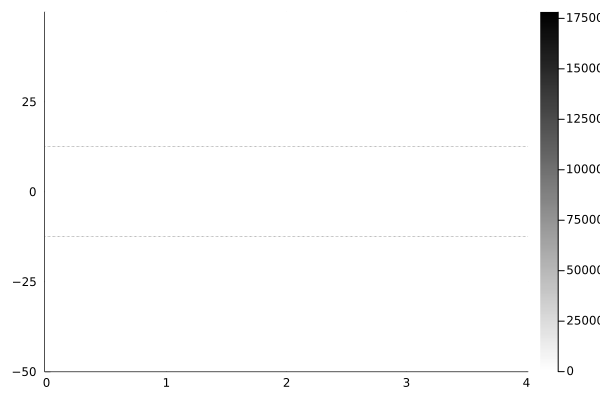

In [4]:
using Plots
using FFTW
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

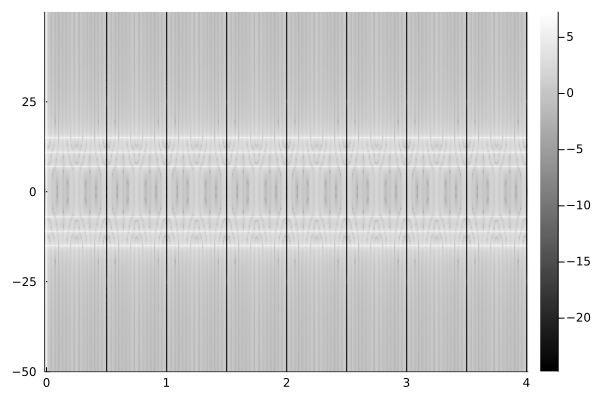

In [18]:
L = 4 #length
T = 20 #Total
delta_t = .01 #Timestep
c = 1 #Wavespeed
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#FFT Code starts here
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(freqs,1)),Int(size(u,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[j,i]=log10(abs(F[j]))
    end
end
#Plotting FFT code starts here
heatmap(x[:],(freqs),B,c=cgrad([:black,:white]))
#parameters: L=4, T=20, delta_t=0.01,delta_r=0.01,c=1
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])

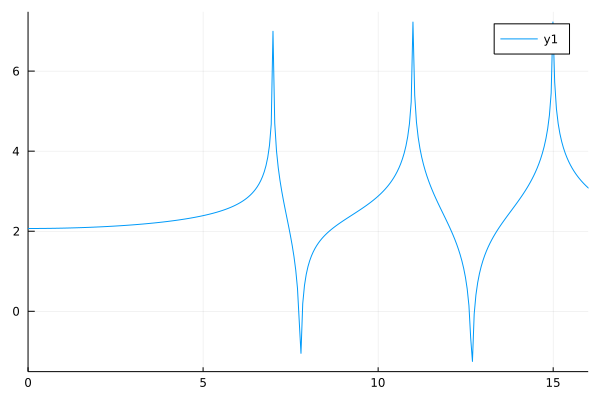

In [20]:
plot(freqs,B[:,300], xlims=(0,16))
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
#Expected Frequencies at 7, 11, and 15. 
# ~Works~

Below this may be outdated code that I just have down here to mess with
______________________________________________________________________

In [ ]:
L = 1 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 1.5 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
using FFTW
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Random Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*rand()
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
using Random

In [ ]:
10*rand()

In [ ]:
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
size(u,2)

In [ ]:
L = 4 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string

In [ ]:
function wave_equation(delta_r, delta_t)
    L = 4
    T = 10
    c= 1.5
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))
        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])
        end
    u[1,:] = -u[3,:]
    u[Int(nrsteps+3),:] = -u[Int(nrsteps+1),:]
    end
    error_list = []
    error_max = 0
    for i =1:Int(nrsteps)+3
        error_list = vcat(error_list,abs(u[i,Int((8/delta_t)+1)]-4*sin(.5*pi*x[i])))
    end
    error_max = maximum(error_list)
    return error_max,delta_r
end
y = []
for i = 0.02:0.01:20
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end
z = []
w = []
#Log the error and delta_r
for i = 1:size(y,1)-2
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)-2
    a = log10(y[i,1][2])
    w = vcat(w,a)
end
plot(w,z)

In [ ]:
d =[]
for i = 1:size(w,1)-1
    d=vcat(d,(z[i+1]-z[i])/(w[i+1]-w[i]))
end

In [ ]:
d

In [ ]:
    L = 4
    T = 10
    c= 1
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))

        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[2,j]=0
            u[Int(nrsteps+2),j]=0
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

        end
    end
    anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
    end
    gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
y = []
for i = 0.02:0.02:10
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end

In [ ]:
z = []
w = []
for i = 1:size(y,1)
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)
    a = log10(y[i,1][2])
    w = vcat(w,a)
end


In [ ]:
plot(w,z)

In [ ]:
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
#Same as above but trying a dirac function in the middle
L = 4 #length
T = 4 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
u = zeros(Int(nrsteps)+2, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+2, 1)
x[1]= -0.5*delta_r
for i = 1:Int(nrsteps)+1
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#=Initial Conditions
for i=1:Int(nrsteps)+2
    u[i,1:2].=4*sin(.5*pi*x[i])
end
=#
#Alternate Initial Conditions
for i=50:Int(nrsteps)-50
    u[i,1]=2
    u[i,2]=2
end


#Leapfrog Integration
for j=2:(Int(ntsteps))
    for i = 2:Int(nrsteps)+1
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])        
    end
end
#B.C
u[1,:] = -u[2,:]
u[Int(nrsteps+2),:]=-u[Int(nrsteps+1),:]
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x,u[:,i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "dirac_function.gif",fps=15)